In [3]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skl
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [4]:
stress = pd.read_csv("Stress-Lysis.csv")
stress.head()

,Humidity,Temperature,Step_count,Stress_Level
0,21.33,90.33,123,mid
1,21.41,90.41,93,mid
2,27.12,96.12,196,high
3,27.64,96.64,177,high
4,10.87,79.87,87,low


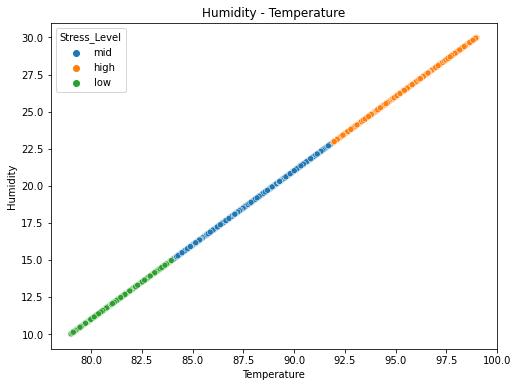

In [5]:

plt.figure(figsize =(8,6))
sns.scatterplot(data=stress,x="Temperature", y="Humidity" ,hue="Stress_Level")
plt.title('Humidity - Temperature')
plt.show()


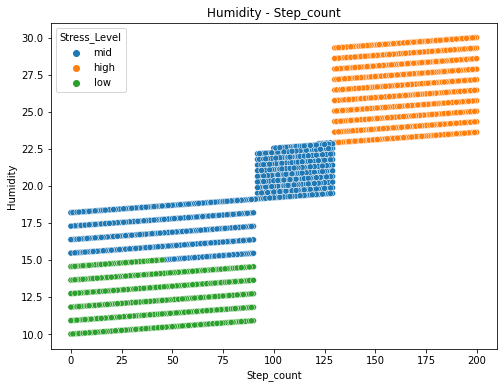

In [6]:

plt.figure(figsize =(8,6))
sns.scatterplot(data=stress,x="Step_count", y="Humidity" ,hue="Stress_Level")
plt.title('Humidity - Step_count')
plt.show()


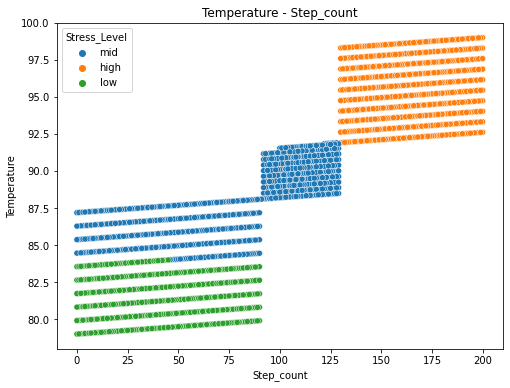

In [7]:

plt.figure(figsize =(8,6))
sns.scatterplot(data=stress,x="Step_count", y="Temperature" ,hue="Stress_Level")
plt.title('Temperature - Step_count')
plt.show()


In [8]:
x=stress.drop([ 'Step_count' , 'Stress_Level' ],axis=1)
y=stress['Stress_Level']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 80)

y_train=y_train.map({'low':0 , 'mid' :1 ,'high':2})
y_test=y_test.map({'low':0 , 'mid' :1 ,'high':2})

In [48]:
from sklearn.linear_model import LogisticRegression
Logistic=LogisticRegression(multi_class = 'ovr')
lgr = Logistic.fit(x_train, y_train)
y_pred = lgr.predict(x_test)

accuracy = skl.metrics.accuracy_score(y_test, y_pred)
print("The accuracy of model is {}".format(accuracy))

f1 = skl.metrics.f1_score(y_test,y_pred,average='macro')
print("f1_score    : {}" . format(f1))

jaccard = skl.metrics.jaccard_score(y_test,y_pred,average='macro')
print("jaccard_score : {}" . format(jaccard))

The accuracy of model is 0.9975062344139651
f1_score    : 0.997736354077048
jaccard_score : 0.9954881050041017


Text(83.40000000000006, 0.5, 'predicted label')

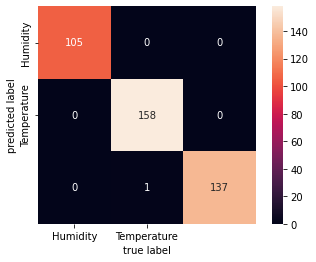

In [26]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion.T, square=True, annot=True, fmt='d', xticklabels=['Humidity', 'Temperature']  , yticklabels=['Humidity', 'Temperature'] )
plt.xlabel('true label')
plt.ylabel('predicted label')

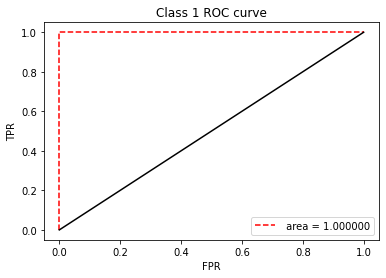

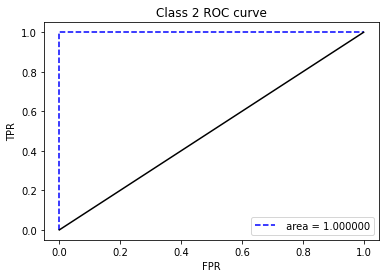

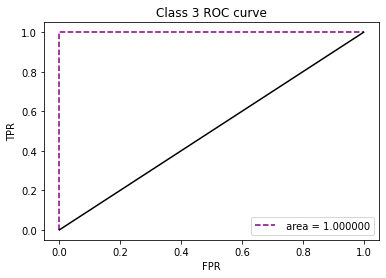

In [49]:
from sklearn.metrics import roc_curve ,auc
from sklearn.metrics import roc_auc_score

y_pred_prob=Logistic.predict_proba(x_test)

fpr[0], tpr[0], thresh[0] = roc_curve(y_test, y_pred_prob[:,0], pos_label=0)
roc_auc[0] = auc(fpr[0], tpr[0])
plt.figure()
plt.plot(fpr[0], tpr[0], linestyle='--',color='red',label=" area = %f" % roc_auc[0])
plt.plot([0, 1], [0, 1], color="black")
plt.title('Class 1 ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()

fpr[1], tpr[1], thresh[1] = roc_curve(y_test, y_pred_prob[:,1], pos_label=1)
roc_auc[1] = auc(fpr[1], tpr[1])
plt.figure()
plt.plot(fpr[1], tpr[1], linestyle='--',color='blue',label=" area = %f" % roc_auc[1])
plt.plot([0, 1], [0, 1], color="black")
plt.title('Class 2 ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
 
fpr[2], tpr[2], thresh[2] = roc_curve(y_test, y_pred_prob[:,2], pos_label=2)
roc_auc[2] = auc(fpr[2], tpr[2])
plt.figure()
plt.plot(fpr[2], tpr[2], linestyle='--',color='purple',label=" area = %f" % roc_auc[2])
plt.plot([0, 1], [0, 1], color="black")
plt.title('Class 3 ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
 